<!-- pour afficher les logos, les telecharger dans le repertoire courant ./figures/ -->

<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<img src='./figures/logo_jupyter.png' style='position:absolute; top:0; left:0;' width='100px' height='' alt='' />

<br/>
<center><b><FONT size ="5pt">École Polytechnique                        </FONT></b></center>
<center>   <FONT size ="5pt">MAP412 : Introduction à l'analyse numérique</FONT>    </center>
<br /> 
<br />

# PC 3 : Intégration numérique, méthodes de quadrature

&nbsp;

## Préparation avant la PC :
**Les exercices 1 et 2 sont à préparer** avant la séance de PC du 16/09.
## <code style="background:orange">À rendre</code> après la PC :
**L'exercice 1 (questions 1 à 4) et l'exercice 2 (questions 1 à 3) contiennent des parties <code style="background:orange">à rendre</code> avant le 18/09 à 20h00. La question 5 de l'exercice 1 et la question 4 de l'exercice 2 sont en bonus**.

In [1]:
# Ce package permet de travailler efficacement avec des tableaux
import numpy as np

# Ce package permet de faire des sorties graphiques
from matplotlib import pyplot as plt

# La fonction scipy.integrate.quad donne une approximation d'une integrale par une formule de quadrature
# on l'utilise ici comme une boite noire
from scipy.integrate import quad
# La fonction scipy.special.sici est utilisee a l'exercice 1
from scipy.special import sici

## Exercice 1 : Intégration d'une fonction oscillante

>On considére la fonction :
>
>\begin{equation*} f: ]0,1] \to [-1,1], \qquad{} f(x) = \sin\left(\frac{1}{x}\right).\end{equation*}
>
>L'objectif de cet exercice est d'étudier différentes manières de calculer numériquement l'intégrale :
>
>\begin{equation*} I =\displaystyle  \int_0^1 f(x)dx. \end{equation*}

In [2]:
def f(x):
    """
    calcule la valeur de f(x)
    ----------   
    parametre:
    x : point ou on evalue f
    
    valeur de retour:
    valeur de f(x)
    """
    return np.sin(1/x)

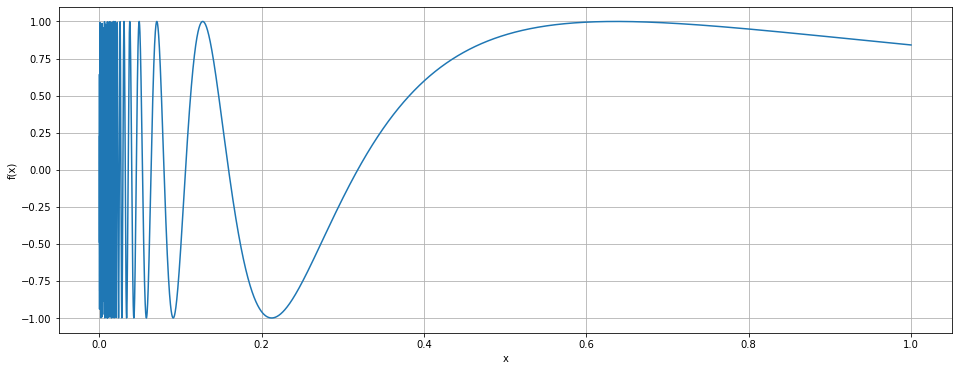

In [3]:
# On represente f sur [0,1]
# creation de la grille
x = np.linspace(1.e-10, 1, 10000)
# creation d'une figure
fig_f = plt.figure(figsize = (16,6))
# trace la figure reliant les points dont les abscisses sont stockees dans grid et les ordonnees dans values
plt.plot(x, f(x))
# nom de l'axe des abscisses
plt.xlabel('x')
# nom de l'axe des ordonnees
plt.ylabel('f(x)')
# trace une grille reguliere sur la figure
plt.grid()
# montre a l'ecran cette figure
plt.show(fig_f)

### Question 1 :
**<code style="background:orange">À rendre :</code>**

- Utiliser la fonction *quad* de *scipy.integrate* pour essayer d'intégrer directement la fonction $f$ sur $]0,1]$. 
- Vous obtenez normalement un message d'avertissement, indiquant que le résultat obtenu peut être imprécis.  Quelle est la caractéristique de $f$ qui rend l'intégration numérique particulièrement difficile?

In [ ]:
# bornes d'integration
a = 0
b = 1

# utiliser quad pour obtenir une approximation de l'integrale et une estimation sur son erreur
I1, err1 = None, None
print(f"Valeur de l'intégrale I : {I1}")
print(f"Estimation de l'erreur : {err1}")

**Réponse :**

### Question 2 :
On note $a_k$ la suite décroissante des zéros de $f$. 

1) Donner la valeur des $a_k$ et écrire l'intégrale $I$ comme une série d'intégrales sur $[a_{k+1},a_k]$. 

2) **<code style="background:orange">À rendre :</code>** 
- Utiliser *quad* de *scipy.integrate* sur chacun des intervalles $[a_{k+1},a_k]$ pour $k \leq N$.
- En supposant que sur chacun de ces intervalles, *quad* renvoie un résulat exact, trouver un critère d'arrêt pour atteindre la précision $\varepsilon$ désirée avec $\varepsilon = 10^{-6}$ et $\varepsilon =10^{-9}$.

    *Indication : On cherchera un critère suffisamment fin pour pouvoir converger en moins de 100000 itérations dans le second cas.*

In [ ]:
def int_adapt(eps, N_max):
    """
    calcule une valeur approchee de l'integrale en utilisant quad sur chaque [a_{k+1},a_k]
    ----------   
    parametre:
    eps   : tolerance sur l'erreur
    N_max : nombre maximal de sous-interval [a_{k+1},a_k]
    
    valeur de retour:
    valeur approchee de l'integrale, nombre d'intervalles utilises pour atteindre la precision
    """
    return None, None
        
# parametres pour l'evaluation
eps_max = 1.e-6
N_max   = 100000

# Evaluation 
I2, N_I2 = int_adapt(eps_max, N_max)
print(f"Valeur de l'intégrale I : {I2}")
print(f"Nombre d'intervalles : {N_I2}")

**Réponse :**

### Question 3 :

1) Montrer que 

\begin{equation*} \int_0^1 f(x)dx = \cos 1 - \int_0^1 2x\cos(1/x)dx. \end{equation*}

2) **<code style="background:orange">À rendre :</code>** 
- Évaluez cette expression à l'aide de *scipy* et comparez la précision obtenue aux résultats des questions 1 et 2. 
- Expliquez l'amélioration de la précision par rapport à la question 1.

In [ ]:
def g(x):
    """
    calcule la valeur de g(x)
    ----------   
    parametre:
    x : point ou on evalue g
    
    valeur de retour:
    valeur de g(x)
    """
    return 2*x*np.cos(1/x)


# bornes d'integration
a = 0
b = 1

# utiliser quad pour obtenir une approximation de l'integrale et une estimation sur son erreur
I3, err3 = None, None
print(f"Valeur de l'intégrale I : {I3}")
print(f"Estimation de l'erreur : {err3}")

In [ ]:
# On represente g sur [-1,1]
# creation de la grille
x     = np.linspace(1.e-10, 1, 10000)
# creation d'une figure
fig_g = plt.figure(figsize = (16,6))
# trace la figure reliant les points dont les abscisses sont stockees dans grid et les ordonnees dans values
plt.plot(x, g(x))
# nom de l'axe des abscisses
plt.xlabel('x')
# nom de l'axe des ordonnees
plt.ylabel('g(x)')
# trace une grille reguliere sur la figure
plt.grid()
# montre a l'ecran cette figure
plt.show(fig_g)

**Réponse :**

### Question 4 :
La fonction cosinus intégral est définie par 

\begin{equation*} \text{Ci}(x) = -\int_x^\infty \frac{\cos t}{t}dt. \end{equation*}

1) Montrer que $I = \sin(1) - \text{Ci}(1)$. 

2) **<code style="background:orange">À rendre :</code>** Utiliser la fonction *scipy.special.sici* pour obtenir la valeur $I$ avec précision machine, en supposant que la fonction *sici* est exacte. 

In [ ]:
# utiliser sici
I4 = None
print(f"Valeur de l'intégrale I : {I4}")

>**Remarque :** L'évaluation précise de $\text{Ci}(x)$ peut se faire a l'aide de la représentation en série sur $\mathbb{R}_+^*$:
>
>\begin{equation*} \text{Ci}(x) = \gamma + \ln (x) +\sum\limits_{n=1}^\infty (-1)^n \frac{x^{2n}}{(2n)!(2n)}\end{equation*}
>
>où $\gamma$ est la constante d'Euler-Mascheroni.

### Question 5 :

Considérer la fonction $h: \mathbb{C}^* \to \mathbb{C}$ définie par $h(z) = -\exp\left(-\frac{i}{z}\right)$.

1) Montrer que l'intégrale $I$ correspond à la partie imaginaire de l'intégrale de $h$ sur le chemin $\gamma_0 : [0,1]\to \mathbb{C}$, $\gamma_0(t) = t$. 

*Pour rappel, l'intégrale d'une fonction $h:\mathbb{C}\to\mathbb{C}$ le long d'un chemin $\gamma:[0,1]\to\mathbb{C}$ de classe $\mathcal{C}^1$ est donnée par*

\begin{equation*} \int_{\gamma} h(z)dz = \int_0^1 h(\gamma(t))\gamma'(t)dt.\end{equation*}

>On admet que 
>
>\begin{equation*} \int_{\gamma_0} h(z)dz = \int_{\gamma_1} h(z)dz,\end{equation*}
>
>où $\gamma_1 : [0,1] \to \Bbb{C}$, $\gamma_1(t) = t+it(1-t)$.

2) **<code style="background:orange">Bonus :</code>**

a) Utiliser *quad* de *scipy.integrate* pour calculer l'intégrale de $h$ sur le chemin $\gamma_1$, et comparer le résultat obtenu avec celui trouvé à la question 4. 

b) Représenter graphiquement la fonction $\text{Im}(h)$ sur le chemin $\gamma_1$ **et expliquer** pourquoi *scipy.integrate* arrive à bien intégrer $h$ sur le chemin $\gamma_1$.

In [ ]:
def im_h_gamma1(t):
    """
    calcule la valeur de Im(h(gamma1(t)) * gamma1'(t))
    ----------   
    parametre:
    t : point ou on evalue h
    
    valeur de retour:
    valeur de Im(h(gamma1(t)) * gamma1'(t))
    """
    return 

# bornes d'integration
a = 0
b = 1

# calcul de l'integrale
I5 = None
print(f"Valeur de l'intégrale I : {I5}")

In [ ]:
# On represente h sur ]0,1]
# creation de la grille
n = 1000
t = np.linspace(1.e-10,1,n+1)
# creation d'une figure
fig_h = plt.figure(figsize = (16,6))

# trace la figure reliant les points dont les abscisses sont stockees dans grid et les ordonnees dans values
# plt.plot(t, im_h_gamma1(t))

# nom de l'axe des abscisses
plt.xlabel('t')
# nom de l'axe des ordonnees
plt.ylabel('Partie imaginaire de h le long du chemin gamma1')
# trace une grille reguliere sur la figure
plt.grid()
# montre a l'ecran cette figure
plt.show(fig_h)

**Réponse :**

## Exercice 2 : Autour de la méthode des trapèzes

>Dans cet exercice, on considère une fonction continue $f:[a,b]\to\mathbb{R}$, et on note $\left\Vert f\right\Vert_{\infty}=\max\limits_{x\in[a,b]}\left\vert f(x)\right\vert$. Étant donné un entier $n$ strictement positif, on note $a=a_0<a_1<\ldots<a_n=b$ la subdivision régulière de l'intervalle $[a,b]$ donnée par
>
>\begin{equation*}a_k = a + k\frac{b-a}{n} \qquad{} \forall~k\in\{0,\ldots,n\},\end{equation*}
>
>et $I_n(f)$ l'intégrale approchée de $f$ entre $a$ et $b$ calculée à l'aide de la méthode des trapèzes :
>
>\begin{equation*}I_n(f) = \frac{b-a}{n}\left(\sum_{k=0}^n f(a_k)-\frac{f(a)+f(b)}{2}\right).\end{equation*}


### Question 1 : Première estimation d'erreur.  

On suppose dans cette question que $f$ est de classe $\mathcal{C}^2$.

1) Soient $x,y\in[a,b]$, $x<y$. Montrer que 

\begin{equation*}\left\vert \int_x^y f(t) dt - (y-x)\frac{f(x)+f(y)}{2}\right\vert \leq \frac{(y-x)^3}{12} \left\Vert f'' \right\Vert_\infty.\end{equation*}

*Indication :* On pourra utiliser une estimation d'erreur entre $f$ et son polynôme d'interpolation de Lagrange.

2) En déduire que 

\begin{equation*} \left\vert \int_a^b f(t) dt - I_n(f) \right\vert \leq \frac{(b-a)^3}{12 n^2} \left\Vert f'' \right\Vert_\infty. \end{equation*}

3) **<code style="background:orange">À rendre :</code>**

a) Implémenter la méthode des trapèzes :
- Construire une fonction qui renvoie $I_n(f)$.
- *Vérifier que votre algorithme renvoie bien la valeur escomptée en intégrant $f(x)=x$ sur $[0,1]$ pour $n=2,3,4$.* 

b) Tester la convergence de la méthode avec la fonction $u : t \mapsto t^3 \ln t$ sur $[1,2]$ : 
- Utiliser ensuite votre algorithme pour calculer de manière approchée l'intégrale de $u : t \mapsto t^3 \ln t$ entre $1$ et $2$. Comparer avec la valeur donnée par la fonction *quad* de *scipy*.
- Tracer en échelle log-log sur le même graphe $\left|\int_a^b f - I_n(f)\right|$ (où $\int_a^b f$ est approché avec *quad* de *scipy*) et $1/n^2$ en fonction de $n$, pour $n = 2, 2^2, ..., 2^{16}$.

In [ ]:
def my_trapeze(f, a, b, n):
    """
    calcule l'approximation de l'integrale de f par la méthode des trapezes
    ----------   
    parametre:
    a, b : bornes d'integration
    n    : nombre de points dans la methode d'integration
    
    valeur de retour:
    valeur approchee de l'integrale
    """
    return 

In [ ]:
def u(x):
    """
    calcule la valeur de u(x)
    ----------   
    parametre:
    x : point ou on evalue u
    
    valeur de retour:
    valeur de u(x)
    """
    return (x**3)*np.log(x)

In [ ]:
# Calcul avec scipy.quad
I_u = None
print(f"Valeur de l'intégrale obtenue par quad de scipy de u entre {1} et {2} : {I_u}")

In [ ]:
# On represente l'erreur sur [1,2]
# creation de la grille et calcul des valeurs 
N      = 16
list_n = 2**np.arange(1, N+1, dtype='int64')

# creation d'une figure
fig_u = plt.figure(figsize = (16,6))


# a modifier :
# ===================== #
# calcul l'approximation de l'integrale pour chaque 2^n (dans l_n) 
In_u  = np.zeros(N) 
# calcul de l'integrale avec scipy.quad
I_u = 0.
# calcul l'erreur entre chaque approximation et la valeur donnee par quad 
Err_u = np.zeros(N)
# ===================== #


# trace la figure
plt.loglog(list_n, Err_u, marker='*', label="Erreur expérimentale")
plt.loglog(list_n, 1/(list_n**2), label="1/N^2")

# nom de l'axe des abscisses
plt.xlabel('Nb. de points', fontsize = 15)
# nom de l'axe des ordonnees
plt.ylabel('Erreur', fontsize = 15)
# taille des légendes
plt.legend(fontsize = 15)
# trace une grille reguliere sur la figure
plt.grid()
# montre a l'ecran cette figure
plt.show(fig_u)

### Question 2 : Utilisation de la formule d'Euler-Maclaurin :

>Si $f$ est de classe $\mathcal{C}^{2k+2}$, $k\in\mathbb{N}$, la formule d'Euler-Maclaurin nous donne une estimation plus précise:
>
>\begin{align*} \int_x^y f(t) dt = (y-x)\frac{f(x)+f(y)}{2} + \sum_{j=1}^k (y-x)^{2j} \frac{b_{2j}}{(2j)!} \left(f^{(2j-1)}(x)-f^{(2j-1)}(y)\right) \quad{}-(y-x)^{2k+3}\frac{b_{2k+2}}{(2k+2)!} f^{(2k+2)}(\xi),\end{align*}
>
>où $b_{2j}$ sont les nombres de Bernoulli. On a notamment $b_2=\frac{1}{6}$, $b_4=\frac{-1}{30}$ et $b_6=\frac{1}{42}$.

1) En supposant $f$ de classe $\mathcal{C}^6$, montrer qu'on a

\begin{equation*} I_n(f) = \int_a^b f(t) dt - \frac{(b-a)^2}{12 n^2} \left(f'(a)-f'(b) \right) + \frac{(b-a)^4}{720 n^4} \left(f^{(3)}(a)-f^{(3)}(b) \right) + O\left(\frac{1}{n^6}\right). \end{equation*}

2) **<code style="background:orange">À rendre :</code>**
- Appliquer la méthode des trapèzes pour approcher l'intégrale de $v : t\mapsto t^3\ln t - \frac{3+12\ln 2}{2}(t-1)^2$ entre $1$ et $2$.
- Comme à la question 1, étudier la convergence de $I_n$. Commenter. 

In [ ]:
def v(x):
    """
    calcule la valeur de v(x)
    ----------   
    parametre:
    x : point ou on evalue v
    
    valeur de retour:
    valeur de v(x)
    """
    return x**3*np.log(x)-(3+12*np.log(2))/2*(x-1)**2

In [ ]:
I_v = None
print(f"Valeur de l'intégrale obtenue par quad de scipy de v entre {1} et {2} : {I_v}")

In [ ]:
# On represente l'erreur sur [1,2]
# creation de la grille et calcul des valeurs 
N      = 16
list_n = 2**np.arange(1, N+1, dtype='int64')

# On represente l'erreur sur [1,2]
# creation d'une figure
fig_v = plt.figure(figsize = (16,6))


#a modifier :
# ===================== #
#calcul l'approximation de l'integrale pour chaque 2^n (dans list_n)
In_v = np.zeros(N)
#calcul de l'integrale avec quad
I_v = 0.
# calcul l'erreur entre chaque approximation et la valeur donnee par quad 
Err_v = np.zeros(N)
# ===================== #


#trace la figure
plt.loglog(list_n, Err_v, marker='*', label="Erreur expérimentale")
plt.loglog(list_n, 1/(1.*list_n)**2, label="1/N^2")
plt.loglog(list_n, 1/(1.*list_n)**4, label="1/N^4")

# nom de l'axe des abscisses
plt.xlabel('Nb. de points', fontsize = 15)
# nom de l'axe des ordonnees
plt.ylabel('Erreur', fontsize = 15)
# taille des légendes
plt.legend(fontsize = 15)
# trace une grille reguliere sur la figure
plt.grid()
# montre a l'ecran cette figure
plt.show(fig_v)

**Réponse :**

### Question 3 : Accélération de convergence, extrapolation de Richardson :

>On suppose dans cette question que $n$ est une puissance de $2$, et que $f$ est de classe $\mathcal{C}^6$.

1) a) Trouver des coefficients $\alpha^{(1)}$ et $\beta^{(1)}$ tels que

\begin{equation*} R^{(1)}_n(f) := \frac{\alpha^{(1)} I_n(f) - I_{\frac{n}{2}}(f)}{\beta^{(1)}} \end{equation*}

vérifie 

\begin{equation*} \left\vert \int_a^b f(t) dt - R^{(1)}_n(f) \right\vert = O\left(\frac{1}{n^4}\right).\end{equation*}

b) Trouver ensuite des coefficients $\alpha^{(2)}$ et $\beta^{(2)}$ tels que

\begin{equation*} R^{(2)}_n(f) := \frac{\alpha^{(2)} R^{(1)}_n(f) - R^{(1)}_{\frac{n}{2}}(f)}{\beta^{(2)}} \end{equation*}

vérifie

\begin{equation*} \left\vert \int_a^b f(t) dt - R^{(2)}_n(f) \right\vert = O\left(\frac{1}{n^6}\right). \end{equation*}

2) **<code style="background:orange">À rendre :</code>** 
- Calculer $R^{(1)}_n$ et $R^{(2)}_n$ pour l'exemple de la fonction $u$ de la question 1. 2).
- Étudier la vitesse de convergence. Commenter.

In [ ]:
# creation de la grille et calcul des valeurs 
N    = 16
l_n  = 2**np.arange(1, N+1, dtype='int64')

# creation d'une figure
fig_err = plt.figure(figsize = (16,6))


# a modifier :
# ===================== #
# calcul de l'integrale calculee avec quad
I_u  = 0.
# calcul des In
In_u = np.zeros(N)

#calcul des Rn1 et de l'erreur par rapport a 
R1_n     = np.zeros(N-1) 
err_R1_n = np.zeros(N-1)

#calcul des Rn2
R2_n     = np.zeros(N-2) 
err_R2_n = np.zeros(N-2)
# ===================== #
 
    
# trace la figure 
plt.loglog(list_n, 1/(1.*list_n)**4)
plt.loglog(list_n, 1/(1.*list_n)**6)
plt.scatter(list_n[1:], err_R1_n)
plt.scatter(list_n[2:], err_R2_n)

# nom de l'axe des abscisses
plt.xlabel('Nb. de points')
# nom de l'axe des ordonnees
plt.ylabel('Erreur')
# legende
plt.legend(["1/N^4","1/N^6","Richardson 1x","Richardson 2x"])
# trace une grille reguliere sur la figure
plt.grid()
# montre a l'ecran cette figure
plt.show(fig_err)

>**Remarque :** pour n = 256, n = 512 et n = 1024, l'erreur obtenue pour R2_n est exactement le zero machine, ce qui explique l'absence de points sur le graphe en échelle log.

**Réponse :**

### Question 4 : Méthode de Romberg :

**<code style="background:orange">Bonus :</code>** On considère à nouveau la fonction $u$ de la question 1. 2). Obtenir une approximation de l'intégrale la plus précise possible **en évaluant $f$ au maximum 65 fois.** 

*Indication : On pourra itérer le processus d'accélération décrit à la question précédente.*

## Exercice 3 : Polynômes orthogonaux et formules de Gauss
>Soit une fonction poids $w \in C^0(]-1,1[)$ positive et telle que
>
>\begin{equation*} \int_{-1}^1 \vert x^n\vert w(x)\, dx < \infty \quad{} \forall~n\in\mathbb{N}. \end{equation*}
>
>On définit le produit scalaire sur $C^0([-1,1])$ et la norme associée 
>
>\begin{equation*} \left<f,\ g\right>_w = \int_{-1}^{1} g(x) f(x) w(x) \, dx, \qquad{} \left\| f \right\|_w = \sqrt{\left<f, \ f\right>_w}. \end{equation*}

### Question 1 : Construction des polynômes orthogonaux :
1) a) Montrer que pour toute fonction poids $w$, il existe une suite $(p_n)_{n\in\mathbb{N}}$ de polynômes orthogonaux 

\begin{equation*} \left<p_n, p_{n'} \right>_w = \alpha_n \delta_{n,n'}, \qquad deg(p_n) = n. \end{equation*}

b) Montrer que si on choisit les $p_n$ normalisés, c'est-à-dire tels que $\alpha_n = 1$, alors cette suite est unique au signe près.

2) Montrer que les polynômes de Legendre $L_n$ et de Tchebychef $T_n$ définis respectivement par
 
\begin{equation*} L_n(x) = \frac{1}{2^{n} n!}\frac{d^n}{dx^n}\left[(x^2-1)^n \right], \quad{} T_n(x) = \cos(n\arccos(x)) \end{equation*}

sont orthogonaux pour les poids $w_L(x) = 1$ et $w_T(x) = \frac{1}{\sqrt{1-x^2}}$.

### Question 2 : Quadrature de Gauss-Legendre :
>Pour une famille $(p_n)_{n\in\mathbb{N}}$ de polynômes orthogonaux, les formules de quadrature de Gauss sont données par 
>
>\begin{equation*} Q(f) = \sum\limits_{i=0}^N w_i f(x_i) \end{equation*}
>
> où les $x_i$ sont les racines de $p_n$. Les poids $w_i$ sont calculés afin que la méthode soit d'ordre le plus élevé possible, c'est-à-dire afin que la méthode soit exacte pour tout polynôme de degrés $N$ avec $N$ le plus grand possible. On peut montrer que le choix de ces points est optimal en terme d'ordre pour le calcul des intégrales $\left<f,1\right>_w$ pour une fonction poids $w$ donnée. 

1) Calculer les points d'interpolation de Legendre $(x_i)_{i=1,\dots,N}$ pour $N=2$ et $N=3$, c'est-à-dire les racines de $L_2$ et de $L_3$.   

2) Calculer les poids $w_i$ associés pour ces deux familles de points.

3) Implémenter une fonction qui prend en entrée une fonction $f$ et renvoie l'approximation de son intégrale sur $[-1,+1]$ par la quadrature de Gauss-Legendre à 2 points.
De même pour la formule à 3 points. 
Tester ces deux fonctions avec les polynômes $x\mapsto x^i$ et en déduire l'ordre de ces formules.

>**Remarque :** Ce résultat sur l'ordre de la quadrature de Gauss-Legendre se généralise avec les autres familles de polynômes orthogonaux. 

### Question 3 : Noyau de Peano :
>Le noyau de Peano $K$ d'une méthode de quadrature $Q$ d'ordre $N$ est défini par
>
>\begin{equation*} K_Q(t) = E_Q(x\mapsto ((x-t)_+)^N ), \qquad{} x_+  = \max(x,0). \end{equation*}

On considère une méthode de quadrature $Q$ d'ordre $N$, et $f\in C^{N+1}([0,1])$. 

1) Montrer que 

\begin{equation*} E_Q(f) = \frac{1}{N!}\int_{0}^{1} f^{(N+1)}(x) K_Q(x) dx. \end{equation*}

2) En déduire une borne supérieur sur l'erreur $E_Q(f)$ en fonction de $\|f^{N+1}\|_\infty$  

In [ ]:
#Si vous souhaitez utiliser le style suivant, telecharger le fichier css sur moodle
#dans le repertoir courant ./style/ et decommenter les lignes suivantes :

from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom3.css").read()
    return HTML(styles)
css_styling()